In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json
import re

Configure the ERDDAP to search

In [2]:
ra = 'SECOORA'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://erddap.secoora.org/erddap


Pull in the processed inventory

In [3]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).


ra_clean = re.sub(r'[0-9]', '', ra) # remove number from RA 

df = pd.read_excel('2023/data/processed/%s.xlsx' % ra_clean.upper(), dtype=str)
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.8016,-79.6188,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.8006,-79.6187,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.536,-79.656,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.536467,-79.658533,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.2789,-80.4102,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SECOORA,Turner Creek Boat Ramp,NaN,Turner Creek Boat Ramp,Water Level Sensor,32.020471,-80.991889,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
124,SECOORA,Walthour Road,NaN,Walthour Road,Water Level Sensor,32.018171,-80.962163,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
125,SECOORA,Lazaretto Creek Fishing Pier,NaN,Lazaretto Creek Fishing Pier,Water Level Sensor,32.014112,-80.884092,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
126,SECOORA,Catalina Drive,NaN,Catalina Drive,Water Level Sensor,32.006419,-80.866956,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [5]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [6]:
not_found = []
found = dict()

exclude = ' -gliders'

#search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

# GLOS
search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']
# SCCOOS
#search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "CAP2"
Found "CAP2": ['cap2wave-capers-nearshore-wave', 'org_cormp_cap2']


searching "Station ID" = "CAP2Wave"
Found "CAP2Wave": ['cap2wave-capers-nearshore-wave']


searching "Station ID" = "CHR60"
Found "CHR60": ['41066-chr60-19-nm-se-of-charlest', '41076-chr60wave-19-nm-se-of-char']


searching "Station ID" = "CHR60WAVE"
Found "CHR60WAVE": ['41076-chr60wave-19-nm-se-of-char']


searching "Station ID" = "FRP2"
Found "FRP2": ['41067-frp2wave-4-nm-southeast-of', 'org_cormp_frp2']


searching "Station ID" = "ILM2"
Found "ILM2": ['41110-ilm2wave-ilm2w-5-miles-', 'org_cormp_ilm2']


searching "Station ID" = "ILM3"
Found "ILM3": ['org_cormp_ilm3']


searching "Station ID" = "LEJ3"
Found "LEJ3": ['41159-lej3wave-lej3w-onslow-b', 'org_cormp_lej3']


searching "Station ID" = "LEJ3Wave"
Found "LEJ3Wave": ['41159-lej3wave-lej3w-onslow-b']


searching "Station ID" = "ILM2Wave"
Found "ILM2Wave": ['41110-ilm2wave-ilm2w-5-miles-']


searching "Station ID" = "SUN2"
Found "S

Found "250": ['250-cape-hatteras-east-nc', 'org_secoora_cmast_ar-250', 'gov_usgs_nwis_02250030', 'gov_usgs_nwis_250802081035500', 'gov_usgs_nwis_02325000', 'gov_usgs_nwis_02252500', 'neuse-river-near-arapahoe-mod', 'gov_usgs_nwis_02232500', 'gov_usgs_nwis_02312500', 'gov_usgs_nwis_260536080302501', 'gov_fl_fldep_8725081', 'gov_usgs_nwis_255250080335001', 'gov_usgs_waterdata_02250030', 'gov_usgs_nwis_02313250', 'gov_usgs_waterdata_02302500', 'gov_usgs_nwis_275917082222500', 'gov_usgs_waterdata_250802081035500', 'gov_usgs_waterdata_02325000', 'gov_usgs_waterdata_02252500', 'gov_usgs_waterdata_02202500', 'gov_usgs_waterdata_02322500', 'gov_usgs_waterdata_02232500', 'gov_usgs_waterdata_02092500', 'gov_usgs_waterdata_02320250', 'gov_usgs_waterdata_02312500', 'gov_usgs_waterdata_260536080302501', 'gov_usgs_waterdata_260725080451001', 'gov_usgs_waterdata_02313250', 'gov_usgs_waterdata_275917082222500', 'gov_usgs_waterdata_255250080335001', 'georgiatech-oatland-island-road-', 'gov_usgs_waterda

punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "McClellanville Town Dock"
Found "McClellanville Town Dock": ['mcclellanville-town-dock']


searching "Station ID" = "Horry County-Enterprise Landing "
no dataset matching "Horry County-Enterprise Landing "
searching "Station Long Name" = "Enterprise Landing,Socastee, SC"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "Horry C, -Church Landing @ Sandy Bluff"
no dataset matching "Horry C, -Church Landing @ Sandy Bluff"
searching "Station Long Name" = "Church Landing at Sandy Bluff Rd Nichols SC"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "St.Phillips Island-SCPRT dock"
no dataset matching "St.Phillips Island-SCPRT dock"
searching "Station Long Name" = "St Phillip's Island-SC PRT Dock"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "hohonu-15"
Found "hohonu-15": ['hohonu-152_north_topsail_beach', 'hohonu_10125_snow-s_cut_bridge', 'hohonu_10007_georget

punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "Tybee Island 4 H Center Dock"
no dataset matching "Tybee Island 4 H Center Dock"
searching "Station Long Name" = "Tybee Island 4 H Center Dock"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "Tybee Island Pier"
no dataset matching "Tybee Island Pier"
searching "Station Long Name" = "Tybee Island Pier"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "A-J's Dockside on Tybee Island"
no dataset matching "A-J's Dockside on Tybee Island"
searching "Station Long Name" = "A-J's Dockside on Tybee Island"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "Hunt Drive at Burnside Island"
Found "Hunt Drive at Burnside Island": ['georgiatech-hunt-drive-on-burnsi']


searching "Station ID" = "Shipyard Road"
Found "Shipyard Road": ['georgiatech-shipyard-road-water-']


searching "Station ID" = "Solomon Bridge"
Found "Solomon Bridge": ['georgiatech-solomon-bridge-water']


Print the stations that we couldn't find.

In [7]:
len(not_found)

25

In [8]:
len(found)

102

Show me the record that has NaN for the first search element.

In [9]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes


Now show me the stations, with identifiers, that we couldn't find.

In [10]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
47,SECOORA,Whitepoint Swash WL,NaN,"White Point Swash,\n(whitepoint_wl_1), North M...",Water Level Sensor,33.792624,-78.736681,fixed,jul 21/ replacedSep-23,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
48,SECOORA,Atlantic Avenue Causeway Bridge Fishing Pier (WL),NaN,"Atlantic Avenue Causeway\n(murrells_inlet_2), ...",Water Level Sensor,33.579828,-79.003625,fixed,2023-07-22 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
52,SECOORA,Waties Causeway 1,NaN,"Waties Causeway\n(waties_causeway_1), SC",Water Level Sensor,33.852724,-78.593925,fixed,2021-07-01 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
53,SECOORA,Marlboro County Cottingham Road N. @ Crooked C...,NaN,Cottingham Road N. at Crooked Creek (sc_secoor...,Water Level Sensor,34.61810775,-79.699751,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
54,SECOORA,Georgetown County_ICW @ South Island Ferry Dock,NaN,"ICW at South Island Ferry, SC (sc_secoora_5)",Water Level Sensor,33.250619,-79.268542,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
56,SECOORA,Horry County-Enterprise Landing,NaN,"Enterprise Landing,Socastee, SC",Water Level Sensor,33.667998,-79.061198,fixed,2023-10-25 00:00:00,N,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
57,SECOORA,"Horry C, -Church Landing @ Sandy Bluff",NaN,Church Landing at Sandy Bluff Rd Nichols SC,Water Level Sensor,34.1406,-79.20595,fixed,2023-10-04 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
58,SECOORA,St.Phillips Island-SCPRT dock,NaN,St Phillip's Island-SC PRT Dock,Water Level Sensor/ Weather Station,32.2988,-80.581583,fixed,2023-10-01 00:00:00,Y,SECOORA,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
100,SECOORA,UGA Marine Extension,NaN,UGA Marine Extension,Water Level Sensor,31.138153,-81.495008,water_level,2023-07-15 00:00:00,Y,SECOORA,Yf,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...
101,SECOORA,Southeast Adventure Outfitters,NaN,Southeast Adventure Outfitters,Water Level Sensor,31.150563,-81.476143,water_level,TBD,N,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...


Print out all the dataset IDs for the datasets that matched our criteria.

In [11]:
found

{'CAP2': {'Dataset ID': ['cap2wave-capers-nearshore-wave', 'org_cormp_cap2']},
 'CAP2Wave': {'Dataset ID': ['cap2wave-capers-nearshore-wave']},
 'CHR60': {'Dataset ID': ['41066-chr60-19-nm-se-of-charlest',
   '41076-chr60wave-19-nm-se-of-char']},
 'CHR60WAVE': {'Dataset ID': ['41076-chr60wave-19-nm-se-of-char']},
 'FRP2': {'Dataset ID': ['41067-frp2wave-4-nm-southeast-of',
   'org_cormp_frp2']},
 'ILM2': {'Dataset ID': ['41110-ilm2wave-ilm2w-5-miles-', 'org_cormp_ilm2']},
 'ILM3': {'Dataset ID': ['org_cormp_ilm3']},
 'LEJ3': {'Dataset ID': ['41159-lej3wave-lej3w-onslow-b', 'org_cormp_lej3']},
 'LEJ3Wave': {'Dataset ID': ['41159-lej3wave-lej3w-onslow-b']},
 'ILM2Wave': {'Dataset ID': ['41110-ilm2wave-ilm2w-5-miles-']},
 'SUN2': {'Dataset ID': ['ssbn7-sun2wave-sun2w-sunset-n',
   'sun2wave-sunset-nearshore-wave',
   'org_cormp_sun2']},
 'SUN2 Wave': {'Dataset ID': ['ssbn7-sun2wave-sun2w-sunset-n',
   'sun2wave-sunset-nearshore-wave']},
 'OB27': {'Dataset ID': ['mooring-ob27m-onslow-bay-n

Check if each found dataset has coverage for specified CY

In [12]:
valid_datasets = []

cy = '2023'

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2023:
{'C11', 'C19', 'C15', 'hohonu-67', 'OB27'}


Show me the inventory metadata about the invalid stations:

In [13]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_not_avail
12,SECOORA,OB27,NaN,OB27,"Non-real time, bottom frame",33.9941,-77.3524,fixed,2000-04-15 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_water_to_direction (mult), eastward_sea_wa...",Non real time bottom mount mooring. VEMCO VR2W...,True
22,SECOORA,C11,NaN,WFS 20m Bottom Mount,20m isobath,27.21,-82.82,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,True
23,SECOORA,C15,NaN,WFS 10m Bottom Mount,10m isobath,27.29,-82.63,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,True
24,SECOORA,C19,NaN,WFS 30m Bottom Mount,30m isobath,24.6172,-82.7243,bottom_mount,2003-09-19 00:00:00,Y,SECOORA/NOAA COMIT,N,USF,Academic,USF,USF,"sea_water_temperature (bottom, 27 m), sea_wate...",Non real time bottom mount mooring.,True
47,SECOORA,Whitepoint Swash WL,NaN,"White Point Swash,\n(whitepoint_wl_1), North M...",Water Level Sensor,33.792624,-78.736681,fixed,jul 21/ replacedSep-23,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
48,SECOORA,Atlantic Avenue Causeway Bridge Fishing Pier (WL),NaN,"Atlantic Avenue Causeway\n(murrells_inlet_2), ...",Water Level Sensor,33.579828,-79.003625,fixed,2023-07-22 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
52,SECOORA,Waties Causeway 1,NaN,"Waties Causeway\n(waties_causeway_1), SC",Water Level Sensor,33.852724,-78.593925,fixed,2021-07-01 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
53,SECOORA,Marlboro County Cottingham Road N. @ Crooked C...,NaN,Cottingham Road N. at Crooked Creek (sc_secoor...,Water Level Sensor,34.61810775,-79.699751,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
54,SECOORA,Georgetown County_ICW @ South Island Ferry Dock,NaN,"ICW at South Island Ferry, SC (sc_secoora_5)",Water Level Sensor,33.250619,-79.268542,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
56,SECOORA,Horry County-Enterprise Landing,NaN,"Enterprise Landing,Socastee, SC",Water Level Sensor,33.667998,-79.061198,fixed,2023-10-25 00:00:00,N,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True


Invert the `erddap_not_avail` column and drop it.

In [14]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_avail
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.8016,-79.6188,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,True
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.8006,-79.6187,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,True
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.536,-79.656,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...,True
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.536467,-79.658533,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,True
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.2789,-80.4102,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SECOORA,Turner Creek Boat Ramp,NaN,Turner Creek Boat Ramp,Water Level Sensor,32.020471,-80.991889,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
124,SECOORA,Walthour Road,NaN,Walthour Road,Water Level Sensor,32.018171,-80.962163,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
125,SECOORA,Lazaretto Creek Fishing Pier,NaN,Lazaretto Creek Fishing Pier,Water Level Sensor,32.014112,-80.884092,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True
126,SECOORA,Catalina Drive,NaN,Catalina Drive,Water Level Sensor,32.006419,-80.866956,water_level,2022-02-12 00:00:00,y,NaN,NaN,Geogia Tech,Academic,Geogia Tech,SECOORA,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,True


Make a plot of all points and color based on ERDDAP available or not.

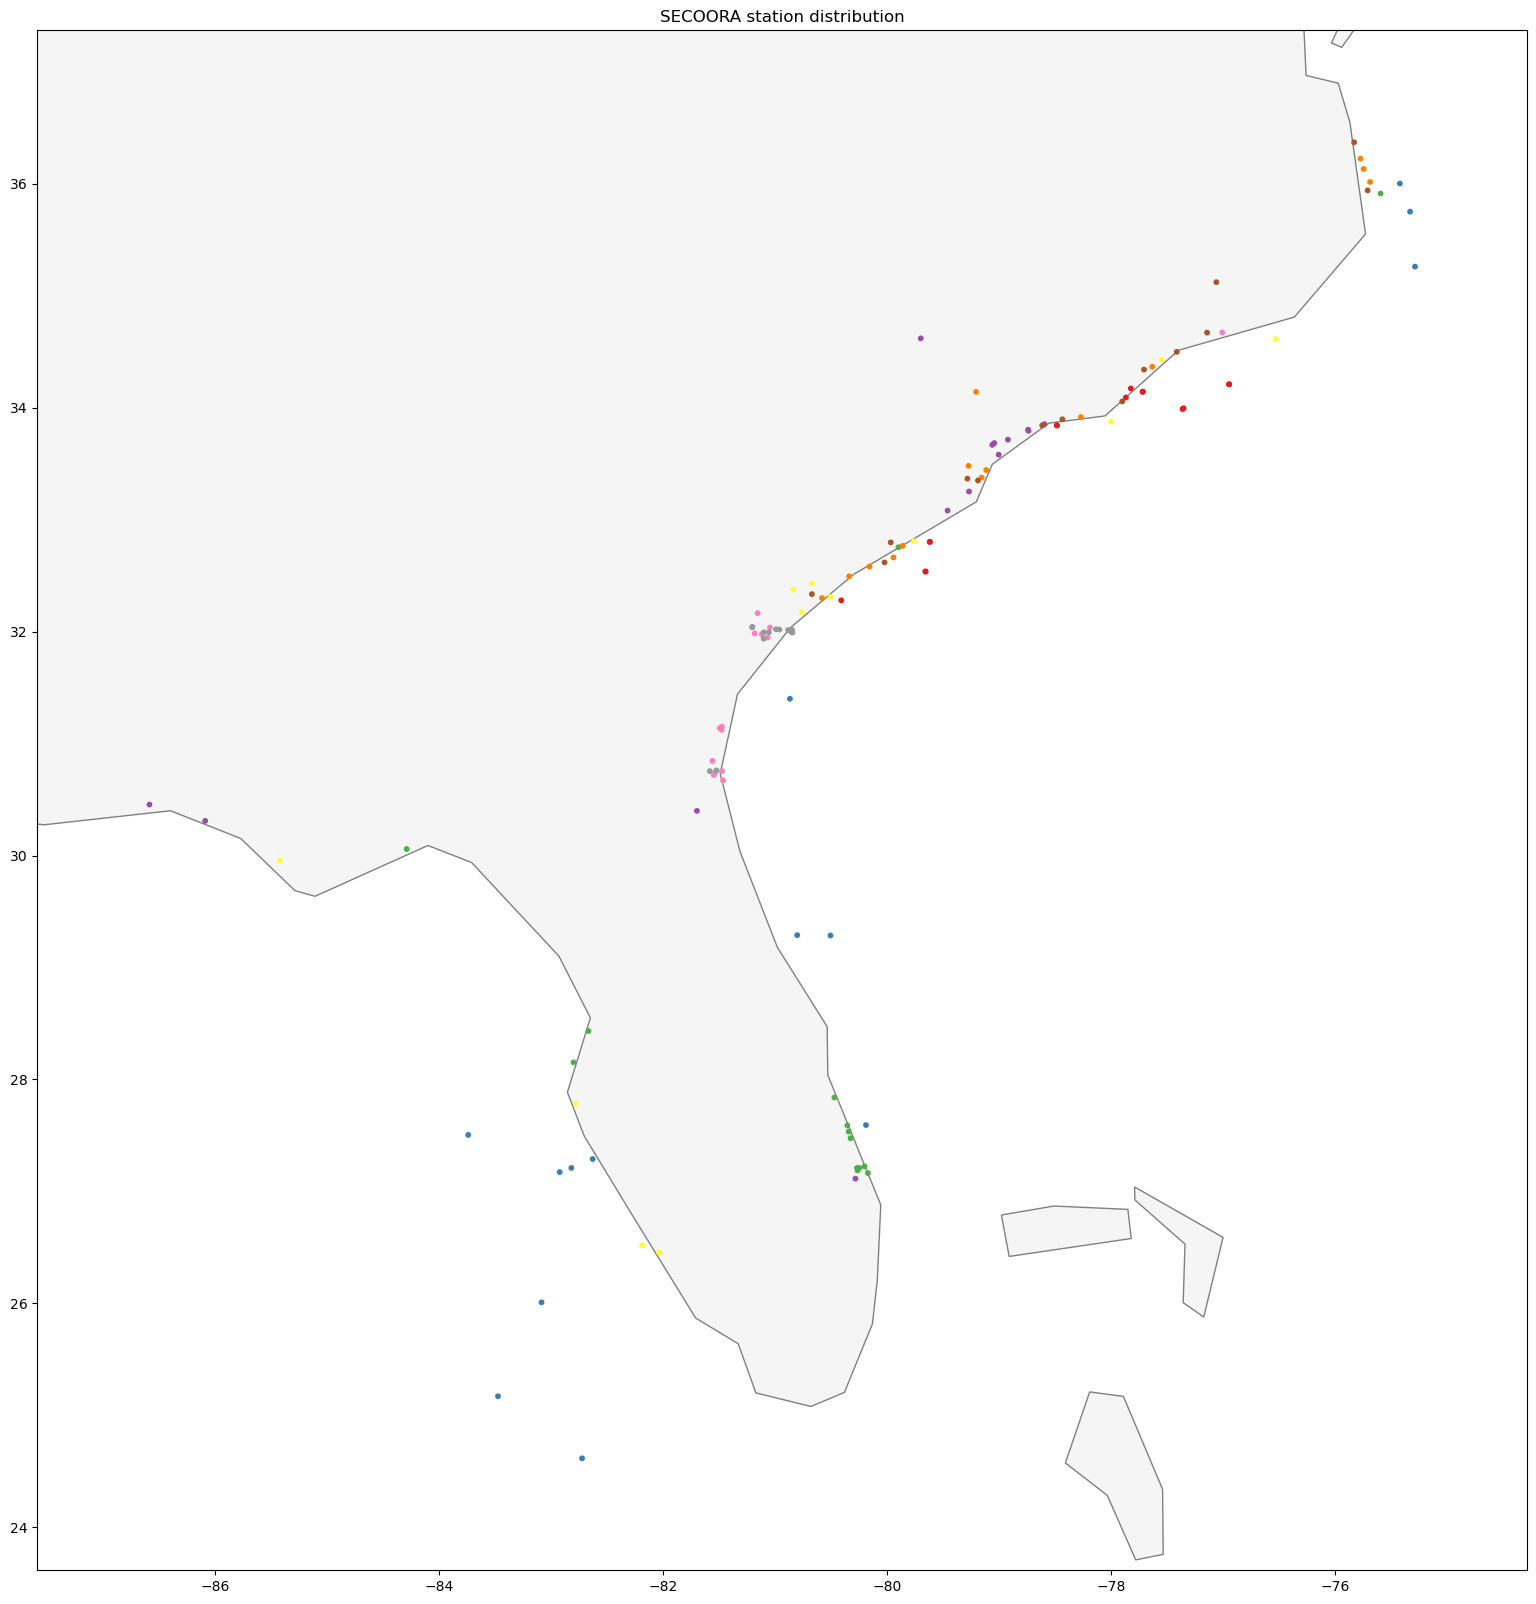

In [15]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         #column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [16]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1')


## Show me some bad coordinates

_if there are any_

In [17]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry


In [18]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [19]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry
12,SECOORA,OB27,NaN,OB27,"Non-real time, bottom frame",33.9941,-77.3524,fixed,2000-04-15 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_water_to_direction (mult), eastward_sea_wa...",Non real time bottom mount mooring. VEMCO VR2W...,False,POINT (-77.35240 33.99410)
22,SECOORA,C11,NaN,WFS 20m Bottom Mount,20m isobath,27.21,-82.82,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,False,POINT (-82.82000 27.21000)
23,SECOORA,C15,NaN,WFS 10m Bottom Mount,10m isobath,27.29,-82.63,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,False,POINT (-82.63000 27.29000)
24,SECOORA,C19,NaN,WFS 30m Bottom Mount,30m isobath,24.6172,-82.7243,bottom_mount,2003-09-19 00:00:00,Y,SECOORA/NOAA COMIT,N,USF,Academic,USF,USF,"sea_water_temperature (bottom, 27 m), sea_wate...",Non real time bottom mount mooring.,False,POINT (-82.72430 24.61720)
47,SECOORA,Whitepoint Swash WL,NaN,"White Point Swash,\n(whitepoint_wl_1), North M...",Water Level Sensor,33.792624,-78.736681,fixed,jul 21/ replacedSep-23,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-78.73668 33.79262)
48,SECOORA,Atlantic Avenue Causeway Bridge Fishing Pier (WL),NaN,"Atlantic Avenue Causeway\n(murrells_inlet_2), ...",Water Level Sensor,33.579828,-79.003625,fixed,2023-07-22 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.00362 33.57983)
52,SECOORA,Waties Causeway 1,NaN,"Waties Causeway\n(waties_causeway_1), SC",Water Level Sensor,33.852724,-78.593925,fixed,2021-07-01 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-78.59392 33.85272)
53,SECOORA,Marlboro County Cottingham Road N. @ Crooked C...,NaN,Cottingham Road N. at Crooked Creek (sc_secoor...,Water Level Sensor,34.61810775,-79.699751,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.69975 34.61811)
54,SECOORA,Georgetown County_ICW @ South Island Ferry Dock,NaN,"ICW at South Island Ferry, SC (sc_secoora_5)",Water Level Sensor,33.250619,-79.268542,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.26854 33.25062)
56,SECOORA,Horry County-Enterprise Landing,NaN,"Enterprise Landing,Socastee, SC",Water Level Sensor,33.667998,-79.061198,fixed,2023-10-25 00:00:00,N,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.06120 33.66800)


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [20]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]


for station in gdf_ckan['Station ID'].dropna():

    RA = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('Station "{}" + RA "{}"'.format(station.lower(), RA.lower()))
    
    # build RA tag query
    fq = '+organization:{}'.format(RA.lower())

    # build free text query
    q = "\""+station.lower()+"\""+" -glider"

    query = ioos_catalog.address + '/dataset/?' + 'q=' + q + '&organization=' + RA.lower()
    
    print('Query: {}'.format(query.replace(" ","%20")))

    datasets = ioos_catalog.action.package_search(q=q, fq=fq)

    

    if datasets['count'] > 0:
        print('\tfound {} dataset(s):'.format(datasets['count']))
        
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('\t{} is valid.'.format(station))
                    break
                else:
                    print('\t{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                print('\t{} missing additional metadata'.format(station))
                problem_datasets.append(station)
    else:
        print("\tNo datasets found!")
        problem_datasets.append(station)

Station "ob27" + RA "secoora"
Query: https://data.ioos.us/dataset/?q="ob27"%20-glider&organization=secoora
	found 2 dataset(s):
	 Mooring OB27M, Onslow Bay, NC
	 https://erddap.secoora.org/erddap/tabledap/mooring-ob27m-onslow-bay-nc
	 Coverage Meta:
		 2012-01-01T00:00:00Z  -  2022-05-23T14:10:00Z 

	OB27 is not valid.
	 Mooring OB27M, Onslow Bay, NC
	 https://erddap.secoora.org/erddap/tabledap/mooring-ob27m-onslow-bay-nc
	 Coverage Meta:
		 2012-01-01T00:00:00Z  -  2022-05-23T14:10:00Z 

	OB27 is not valid.
Station "c11" + RA "secoora"
Query: https://data.ioos.us/dataset/?q="c11"%20-glider&organization=secoora
	found 7 dataset(s):
	 Little St. Marks River
	 https://erddap.secoora.org/erddap/tabledap/little-st-marks-river
	 Coverage Meta:
		 2013-04-23T14:00:00Z  -  2021-01-01T03:45:00Z 

	C11 is not valid.
	 GACRA Array, Station BNOS01, Bottom Temperature
	 https://erddap.secoora.org/erddap/tabledap/org_secoora_gacra_bnos01
	 Coverage Meta:
		 2019-08-21T13:00:00Z  -  2022-05-05T14:00

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [21]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry
12,SECOORA,OB27,NaN,OB27,"Non-real time, bottom frame",33.9941,-77.3524,fixed,2000-04-15 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_water_to_direction (mult), eastward_sea_wa...",Non real time bottom mount mooring. VEMCO VR2W...,False,POINT (-77.35240 33.99410)
22,SECOORA,C11,NaN,WFS 20m Bottom Mount,20m isobath,27.21,-82.82,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,False,POINT (-82.82000 27.21000)
23,SECOORA,C15,NaN,WFS 10m Bottom Mount,10m isobath,27.29,-82.63,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,False,POINT (-82.63000 27.29000)
47,SECOORA,Whitepoint Swash WL,NaN,"White Point Swash,\n(whitepoint_wl_1), North M...",Water Level Sensor,33.792624,-78.736681,fixed,jul 21/ replacedSep-23,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-78.73668 33.79262)
48,SECOORA,Atlantic Avenue Causeway Bridge Fishing Pier (WL),NaN,"Atlantic Avenue Causeway\n(murrells_inlet_2), ...",Water Level Sensor,33.579828,-79.003625,fixed,2023-07-22 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.00362 33.57983)
52,SECOORA,Waties Causeway 1,NaN,"Waties Causeway\n(waties_causeway_1), SC",Water Level Sensor,33.852724,-78.593925,fixed,2021-07-01 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-78.59392 33.85272)
53,SECOORA,Marlboro County Cottingham Road N. @ Crooked C...,NaN,Cottingham Road N. at Crooked Creek (sc_secoor...,Water Level Sensor,34.61810775,-79.699751,fixed,2023-02-14 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.69975 34.61811)
56,SECOORA,Horry County-Enterprise Landing,NaN,"Enterprise Landing,Socastee, SC",Water Level Sensor,33.667998,-79.061198,fixed,2023-10-25 00:00:00,N,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.06120 33.66800)
57,SECOORA,"Horry C, -Church Landing @ Sandy Bluff",NaN,Church Landing at Sandy Bluff Rd Nichols SC,Water Level Sensor,34.1406,-79.20595,fixed,2023-10-04 00:00:00,Y,CCU,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-79.20595 34.14060)
58,SECOORA,St.Phillips Island-SCPRT dock,NaN,St Phillip's Island-SC PRT Dock,Water Level Sensor/ Weather Station,32.2988,-80.581583,fixed,2023-10-01 00:00:00,Y,SECOORA,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,False,POINT (-80.58158 32.29880)


Print out the available metadata from the IOOS Catalog for the last dataset.

In [22]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': '0ea3933c-4674-41dd-a17d-bfbc8c99bd75',
 'id': '0dc06a87-b820-4f11-bc50-d43334632416',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2023-10-19T19:47:12.588040',
 'metadata_modified': '2024-01-08T22:58:39.861558',
 'name': 'georgetown-county-icw-south-island-ferry-dockb72c8',
 'notes': "Timeseries data from 'Georgetown County-ICW @ South Island Ferry Dock' (georgetown-county-icw-south-isla)",
 'num_resources': 5,
 'num_tags': 14,
 'organization': {'id': '09cf7d59-3604-44f7-9c2c-5909d9705e40',
  'name': 'secoora',
  'title': 'SECOORA',
  'type': 'organization',
  'description': 'SECOORA, the Southeast Coastal Ocean Observing Regional Association, is the regional solution to integrating coastal and ocean observing data and information in the Southeast United States. SECOORA is a 501(c)(3) nonprofit incorporated in September 2007 that coordinat

In [23]:
# GLOS special case as they provide ERDDAP ID

# for dataset in gdf_final.loc[(~gdf_final['erddap_avail'] & ~gdf_final['Dataset (ERDDAP) ID'].isna()),'Dataset (ERDDAP) ID'].tolist():
#     print(dataset)
#     e.dataset_id = dataset
    
#     e.constraints = {
#                  "time>=": "{}-01-01".format(cy)
#             }
        
#     e.variables = ['time']
    
#     try:
        
#         df_data = e.to_pandas(parse_dates=True)
        
#         string = '\tDate range: {} - {}'.format(df_data.min()[0],df_data.max()[0])
        
#         print(string)
        
#         if pd.to_datetime(df_data.max()[0], utc=True) > pd.to_datetime('{}-01-01'.format(cy), utc=True):
            
#             datasetid = gdf_final.loc[gdf_final['Dataset (ERDDAP) ID']==dataset,'Station ID'].tolist()[0]
            
#             problem_datasets.remove(datasetid)
        
#     except:
#         print('\tNo valid data')

In [24]:
#gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]